In [1]:
from easydict import EasyDict as edict
import numpy as np
#from tensorflow.python.keras.backend import set_session
#from tensorflow.python.keras.models import load_model

In [6]:
#import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#tf.disable_v2_behavior()
from generate_network import generate_network as model_fn

test_config = tf.compat.v1.ConfigProto(device_count = {'GPU': 1}, allow_soft_placement=True, log_device_placement=True)
test_config.gpu_options.allow_growth=True 

ImportError: attempted relative import with no known parent package

In [3]:
from generate_data_test_without_blank_depth import input_fn_maker
#from generate_data_train_without_blank_depth import input_fn_maker

test_file=['/mnt/sda1/mike/OULU-NPU/One_video_frame', '/mnt/sda1/mike/OULU-NPU/One_video_depth']
test_data_list=[test_file]

eval_input_fn = lambda: input_fn_maker(test_data_list, shuffle=False, 
                                batch_size = 1,
                                epoch=1)

In [4]:
data = input_fn_maker(test_data_list, shuffle=False, 
                                batch_size = 1,
                                epoch=1)

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [5]:
print(list(data))

['images', 'maps', 'masks', 'labels']


In [6]:
print((data['images'].shape))
print(type(data['images']))
print((data['maps'].shape))
print(type(data['maps']))
print((data['masks'].shape))
print(type(data['masks']))
print((data['labels'].shape))
print(type(data['labels']))

(None, 256, 256, 15)
<class 'tensorflow.python.framework.ops.Tensor'>
(None, 32, 32, 5)
<class 'tensorflow.python.framework.ops.Tensor'>
(None, 32, 32, 5)
<class 'tensorflow.python.framework.ops.Tensor'>
(None, 1)
<class 'tensorflow.python.framework.ops.Tensor'>


In [7]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

#latest_ckp = tf.train.latest_checkpoint('model.ckpt-19501')
print_tensors_in_checkpoint_file(file_name='model.ckpt-19501', tensor_name='', all_tensors=False, all_tensor_names=True)

tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/bias (float32) [64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/bias/Adadelta (float32) [64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/bias/Adadelta_1 (float32) [64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/kernel (float32) [3, 3, 192, 64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/kernel/Adadelta (float32) [3, 3, 192, 64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/candidate/kernel/Adadelta_1 (float32) [3, 3, 192, 64]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/bias (float32) [128]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/bias/Adadelta (float32) [128]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/bias/Adadelta_1 (float32) [128]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/kernel (float32) [3, 3, 192, 128]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/kernel/Adadelta (float32) [3, 3, 192, 128]
tensor: ConvLSTMNet/cell_1/conv_gru_cell/gates/kernel/Adadelta_1 (float32) [3, 3, 192, 128]
tensor: 

In [8]:
## load multi-frame anti-spoofing model
# trained_checkpoint_prefix = 'checkpoints/dev'
trained_checkpoint_prefix = 'model.ckpt-19501'
export_dir = os.path.join('model_weight', '0') # IMPORTANT: each model folder must be named '0', '1', ... Otherwise it will fail!

loaded_graph = tf.Graph()
with tf.compat.v1.Session(config=test_config,graph=loaded_graph) as sess:
    # Restore from checkpoint
    #sess.graph._unsafe_unfinalize()
    loader = tf.compat.v1.train.import_meta_graph(trained_checkpoint_prefix + '.meta')
    loader.restore(sess, trained_checkpoint_prefix)
    #biases_tensor = loaded_graph.get_tensor_by_name('image_tensor:0')
    #boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    #scores = detection_graph.get_tensor_by_name('detection_scores:0')
    
    # Make predictions
    #_boxes, _scores = sess.run([boxes, scores], feed_dict={image_tensor: image_np_expanded}) 
    
    #sess.run('softmax_linear/softmax_linear:0', 
            #feed_dict={'is_training:0': False, 'imgs:0': img})
    # Export checkpoint to SavedModel
    #builder = tf.compat.v1.saved_model.builder.SavedModelBuilder(export_dir)
    #builder.add_meta_graph_and_variables(sess, ["train", "serve"], strip_default_attrs=True)
    #builder.save()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

'metric_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from model.ckpt-19501


In [9]:
# GPU config
# config = tf.ConfigProto()  
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True 

#sess = tf.compat.v1.Session(config=config)

# # create estimator
this_config=tf.estimator.RunConfig(
    save_summary_steps=10000000000,
    save_checkpoints_steps=None,
    keep_checkpoint_max=1024,
    log_step_count_steps=None,
    session_config=config)

# model fn
model_fn_this=model_fn

# model_dir
inference_model_dir = 'model_finetune/'

In [10]:
mnist_classifier = tf.estimator.Estimator(
    model_fn=model_fn_this, config=this_config, model_dir=inference_model_dir)

INFO:tensorflow:Using config: {'_model_dir': 'model_finetune/', '_tf_random_seed': None, '_save_summary_steps': 10000000000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  allow_growth: true
}
, '_keep_checkpoint_max': 1024, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
save_path = "./saved_model/"

feature_spec = {"images": tf.placeholder(dtype=tf.float32, shape=[None, 256, 256, 15], name='images'),
               "maps": tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 5], name='maps'),
               "masks": tf.placeholder(dtype=tf.float32, shape=[None, 256, 256, 15], name='masks'),
               "labels": tf.placeholder(dtype=tf.int32, shape=[None, 1], name='labels')}

input_receiver_fn = tf.estimator.export.build_raw_serving_input_receiver_fn(feature_spec)

#mnist_classifier.export_savedmodel(save_path, input_receiver_fn)

Instructions for updating:
This function has been renamed, use `export_saved_model` instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Calling model_fn.
(None, 1)
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use keras.layers.Flatten instead.
(None, 256, 256, 15)
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatur

b'./saved_model/1617100141'

In [11]:
print(type(data["images"]))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    images_np = data["images"].eval()
    
print(type(images_np))

<class 'tensorflow.python.framework.ops.Tensor'>
Dataset Info:
----------------------------------------
IJCB ijcb_protocal_1 test
File Counts: 1
----------------------------------------
<class 'numpy.ndarray'>


In [12]:
features = mnist_classifier.predict(
                input_fn = eval_input_fn,
                checkpoint_path = os.path.join(inference_model_dir, 'model.ckpt-19501'))

In [13]:
feature = list(features)[0]
label = feature['labels']

#print(label.shape)
#print(label)

if label == 0:
    label = 1
else:
    label = 0

labels_onehot = np.eye(2)[label]
#print(logits)
#print(label)
#print(labels_onehot)

label = np.array(label)
label = np.reshape(label,(1,1))
print(label.shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Calling model_fn.
(None, 1)
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use keras.layers.Flatten instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_finetune/model.ckpt-19501
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Dataset Info:
----------------------------------------
IJCB ijcb_protocal_1 test
File Counts: 1
----------------------------------------
(1, 1)


# 算出來了啦幹!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [57]:
#model_path = "./saved_model/1616739346"
model_path = "./saved_model/1617094023"

with tf.Session(graph=tf.Graph()) as sess:
    meta_graph_def = tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.SERVING], model_path)
    signature = meta_graph_def.signature_def
    #print(signature)
    x_tensor_name = signature['serving_default'].inputs['images'].name
    label_tensor_name = signature['serving_default'].inputs['labels'].name
    #print(x_tensor_name)    
    logit_tensor_name = signature['serving_default'].outputs['logits'].name
    y_tensor_name = signature['serving_default'].outputs['grads'].name
    #print(y_tensor_name)
    x = sess.graph.get_tensor_by_name(x_tensor_name)
    y = sess.graph.get_tensor_by_name(y_tensor_name)
    labels = sess.graph.get_tensor_by_name(label_tensor_name)
    logits = sess.graph.get_tensor_by_name(logit_tensor_name)
    
    #print(label.shape)
    
    grads = sess.run(y, {x: images_np, labels: label})
    #print(grads)
    #print(grads.shape)
    
    #print(predictions)
    #print(type(predictions))
    
    #labels_tensor = tf.convert_to_tensor(labels_onehot, dtype=tf.float32)
    #logits_tensor = tf.convert_to_tensor(predictions, dtype=tf.float32)
    #print(type(logits_tensor))
    #labels_tensor = tf.expand_dims(labels_tensor,0)
    #print(labels_tensor.shape)
    #print(logits_tensor.shape)
    
    #cross_entropy = tf.losses.softmax_cross_entropy(labels_tensor, logits_tensor)
    #print(cross_entropy)
    #print(cross_entropy.eval())
    
    #grad = tf.gradients(cross_entropy, x)
    #print(grad)
    
    perb = tf.sign(grads)  # calculate perturbation
    #print(perb.eval())
    perturbation = perb.eval()
    print(type(perturbation))
    
    ## Test FGSM ##
    
    original_prediction = sess.run(logits, {x: images_np, labels: label})
    print("original: ", original_prediction)
    
    eps = 0.5
    adv_images = images_np + eps * perturbation
    prediction = sess.run(logits, {x: adv_images})
    print("attack: ", prediction)

INFO:tensorflow:Restoring parameters from ./saved_model/1617094023/variables/variables
<class 'numpy.ndarray'>
original:  [[0.03379662 0.9662034 ]]
attack:  [[0.5344409  0.46555912]]


In [61]:
#print(images_np)

images_squeeze = np.squeeze(images_np)
frame1, frame2, frame3, frame4, frame5 = np.split(images_squeeze, indices_or_sections=5, axis=2)
print(frame1.shape)

(256, 256, 3)


In [62]:
adv_images_squeeze = np.squeeze(adv_images)
adv_frame1, adv_frame2, adv_frame3, adv_frame4, adv_frame5 = np.split(adv_images_squeeze, indices_or_sections=5, axis=2)
print(adv_frame1.shape)

(256, 256, 3)


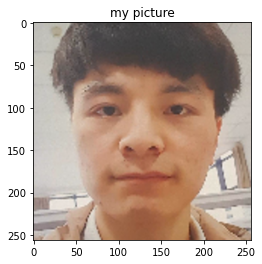

In [63]:
from matplotlib import pyplot as plt

plt.imshow(frame1)
plt.title('my picture')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


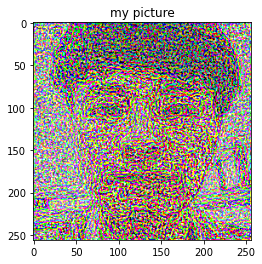

In [64]:
plt.imshow(adv_frame1)
plt.title('my picture')
plt.show()